<a href="https://colab.research.google.com/github/Duy3lai/250411to250601/blob/main/20250412.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

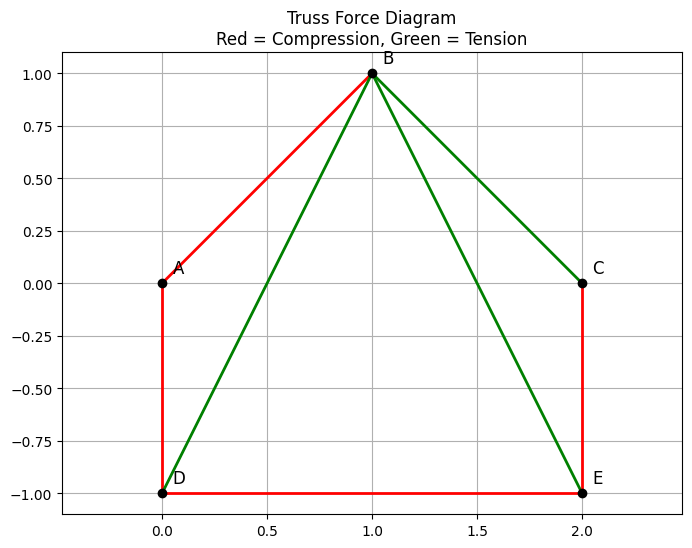

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define joint coordinates
joints = {
    'A': np.array([0, 0]),
    'B': np.array([1, 1]),
    'C': np.array([2, 0]),
    'D': np.array([0, -1]),
    'E': np.array([2, -1])
}

# Define members as connections between joints
members = [
    ('A', 'B'),
    ('B', 'C'),
    ('A', 'D'),
    ('B', 'D'),
    ('B', 'E'),
    ('C', 'E'),
    ('D', 'E')
]

# External forces on joints (Fx, Fy)
forces = {
    'A': np.array([0, 0]),
    'B': np.array([0, -100]),  # Load downwards at B
    'C': np.array([0, 0]),
    'D': np.array([0, 0]),
    'E': np.array([0, 0])
}

# Create the system of equations
num_members = len(members)
num_joints = len(joints)
A_matrix = np.zeros((2 * num_joints, num_members))
b_vector = np.zeros(2 * num_joints)

joint_list = list(joints.keys())

for i, (joint1, joint2) in enumerate(members):
    coord1 = joints[joint1]
    coord2 = joints[joint2]
    length = np.linalg.norm(coord2 - coord1)
    direction = (coord2 - coord1) / length  # unit vector

    j1_idx = joint_list.index(joint1)
    j2_idx = joint_list.index(joint2)

    # X-component
    A_matrix[2 * j1_idx, i] = direction[0]
    A_matrix[2 * j2_idx, i] = -direction[0]

    # Y-component
    A_matrix[2 * j1_idx + 1, i] = direction[1]
    A_matrix[2 * j2_idx + 1, i] = -direction[1]

# Fill in external forces
for idx, joint in enumerate(joint_list):
    b_vector[2 * idx:2 * idx + 2] = forces[joint]

# Solve the system (least squares in case it's overdetermined)
forces_solution, residuals, rank, s = np.linalg.lstsq(A_matrix, b_vector, rcond=None)

# Plotting the truss and forces
plt.figure(figsize=(8, 6))
for (joint1, joint2), force in zip(members, forces_solution):
    coord1 = joints[joint1]
    coord2 = joints[joint2]
    color = 'red' if force < 0 else 'green'  # Compression or Tension
    plt.plot([coord1[0], coord2[0]], [coord1[1], coord2[1]], color=color, linewidth=2)

# Draw joints
for joint, coord in joints.items():
    plt.plot(coord[0], coord[1], 'ko')
    plt.text(coord[0] + 0.05, coord[1] + 0.05, joint, fontsize=12)

# Style
plt.title('Truss Force Diagram\nRed = Compression, Green = Tension')
plt.grid(True)
plt.axis('equal')
plt.show()
